In [83]:
# Ispirato dal video https://youtu.be/AX7haUov9AY?si=TTq4SUO4eJXhKCI1

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import itertools
import numpy as np
import math
import random
import numpy as np
from scipy.signal import argrelextrema

In [85]:
pd.set_option('expand_frame_repr', False) # Serve a fare in modo che nelle celle di output le tabelle si vedano su una riga unica e non con gli "a capo"

## Simulazione singola

In [86]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati.rename(columns={'Date':'Timestamp', 'Close':'Price'}, inplace=True)
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati = dati[['Timestamp', 'Price']]
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


<h6> Eventuale cambio dati </h6>

In [87]:
def calcola_prezzo(t):
    return dati['Price'][t]

In [88]:
dati['Price'] = dati.index.map(calcola_prezzo)
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


<h6> Scelta periodo </h6>

In [89]:
data_inizio = '2020-03-01'
data_fine = '2020-04-01'

data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1]
dati = dati.reset_index(drop=True)
dati

,Timestamp,Price
0,2020-03-01 00:00:00+00:00,7748.164551
1,2020-03-02 00:00:00+00:00,7959.358398
2,2020-03-03 00:00:00+00:00,7862.485352
3,2020-03-04 00:00:00+00:00,7861.055176
4,2020-03-05 00:00:00+00:00,8089.786133
5,2020-03-06 00:00:00+00:00,8082.739746
6,2020-03-07 00:00:00+00:00,7894.343750
7,2020-03-08 00:00:00+00:00,7121.034180
8,2020-03-09 00:00:00+00:00,6952.206055
9,2020-03-10 00:00:00+00:00,6989.210938


<h6> Grafico dati </h6>

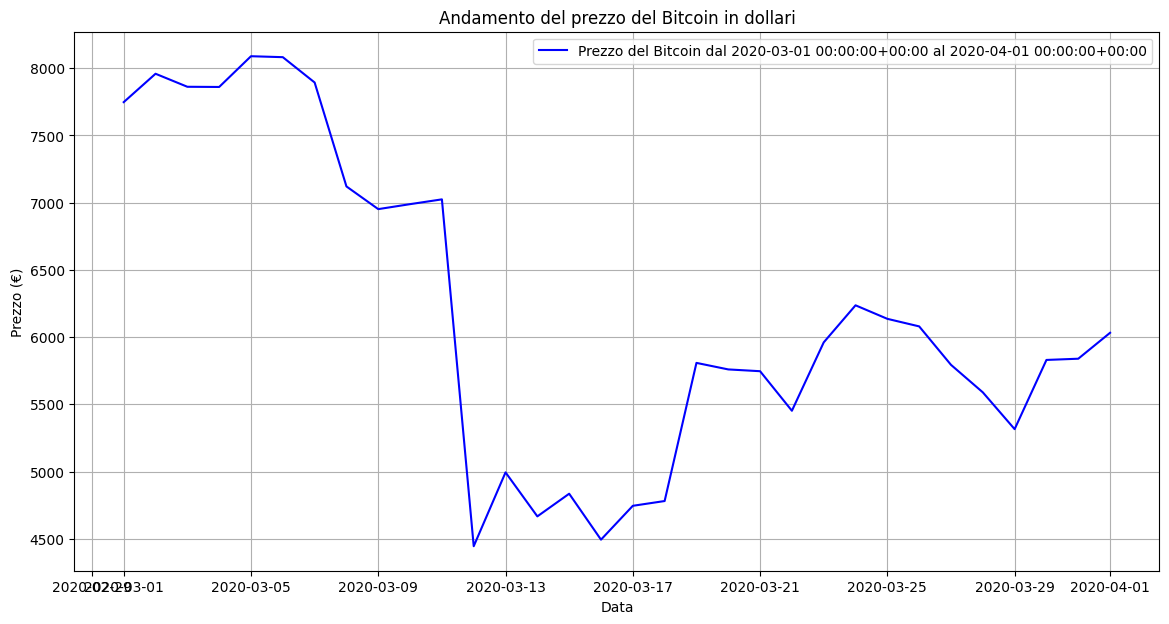

In [90]:
x = dati['Timestamp']
y = dati['Price']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Prezzo del Bitcoin dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Andamento del prezzo del Bitcoin in dollari')
plt.xlabel('Data')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.grid(True)
plt.show()

<h6> Simulazione </h6>

In [91]:
capitale_iniziale = 1000
bitcoin_iniziali = 0

capitale = capitale_iniziale
bitcoins = bitcoin_iniziali
ultima_azione = 'Vendita'

N = 3
scarto_minimo = 0.5
scarto_massimo = 0.5
perc_acquisto = 1
perc_vendita = 1
timeframe = 1
dati['Min'] = dati['Price'].rolling(window=N).min()
dati['Max'] = dati['Price'].rolling(window=N).max()


azioni = []
ultime_azioni = []
quantita_euro = []
quantita_bitcoin = []
capitale_lista = []
bitcoins_lista = []
valore_bitcoin_lista = []
portafoglio_lista = []
valore_quantita_euro = 0
valore_quantita_bitcoin = 0
azione = '-'

for i in range(N, len(dati)):
    if i % timeframe == 0:
        if dati['Price'].iloc[i] < dati['Min'].iloc[i] * (1 + scarto_minimo) and ultima_azione == 'Vendita':
            prezzo_acquisto = dati['Price'].iloc[i]
            bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
            capitale -= prezzo_acquisto * bitcoins_acquistati
            bitcoins += bitcoins_acquistati
            azione = 'Acquisto'
            ultima_azione = azione
            valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
            valore_quantita_bitcoin = bitcoins_acquistati
        elif dati['Price'].iloc[i] > dati['Max'].iloc[i] * (1 - scarto_massimo) and ultima_azione == 'Acquisto' and dati['Price'].iloc[i] > prezzo_acquisto:
            prezzo_vendita = dati['Price'].iloc[i]
            bitcoins_venduti = bitcoins * perc_vendita
            capitale += prezzo_vendita * bitcoins_venduti
            bitcoins -= bitcoins_venduti
            azione = 'Vendita'
            ultima_azione = azione
            valore_quantita_euro = prezzo_vendita * bitcoins_venduti
            valore_quantita_bitcoin = bitcoins_venduti
        else:
            azione = '-'
            valore_quantita_euro = 0
            valore_quantita_bitcoin = 0
    else:
        azione = '-'
        valore_quantita_euro = 0
        valore_quantita_bitcoin = 0
    
    azioni.append(azione)
    ultime_azioni.append(ultima_azione)
    quantita_euro.append(valore_quantita_euro)
    quantita_bitcoin.append(valore_quantita_bitcoin)
    capitale_lista.append(capitale)
    bitcoins_lista.append(bitcoins)
    valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[i])
    portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[i])


rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]


tabella_finale = pd.DataFrame({
    'Data': dati['Timestamp'].iloc[N:],
    'Prezzo Bitcoin (€)': dati['Price'].iloc[N:],
    'Min': dati['Min'].iloc[N:],
    'Max': dati['Max'].iloc[N:],
    'Azione': azioni,
    'Ultima azione': ultime_azioni,
    '€ acquistati/venduti': quantita_euro,
    'Bitcoin acquistati/venduti': quantita_bitcoin,
    'Capitale (€)': capitale_lista,
    'Bitcoin posseduti': bitcoins_lista,
    'Valore Bitcoin (€)': valore_bitcoin_lista,
    'Portafoglio totale (€)': portafoglio_lista
})

In [92]:
tabella_finale

,Data,Prezzo Bitcoin (€),Min,Max,Azione,Ultima azione,€ acquistati/venduti,Quantità Bitcoin,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
3,2020-03-04 00:00:00+00:00,7861.055176,7861.055176,7959.358398,Acquisto,Acquisto,1000.000000,0.127209,1.136868e-13,0.127209,1000.000000,1000.000000
4,2020-03-05 00:00:00+00:00,8089.786133,7861.055176,8089.786133,Vendita,Vendita,1029.096725,0.127209,1.029097e+03,0.000000,0.000000,1029.096725
5,2020-03-06 00:00:00+00:00,8082.739746,7861.055176,8089.786133,Acquisto,Acquisto,1029.096725,0.127320,0.000000e+00,0.127320,1029.096725,1029.096725
6,2020-03-07 00:00:00+00:00,7894.343750,7894.343750,8089.786133,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,1005.110093,1005.110093
7,2020-03-08 00:00:00+00:00,7121.034180,7121.034180,8082.739746,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,906.652098,906.652098
8,2020-03-09 00:00:00+00:00,6952.206055,6952.206055,7894.343750,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,885.156853,885.156853
9,2020-03-10 00:00:00+00:00,6989.210938,6952.206055,7121.034180,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,889.868325,889.868325
10,2020-03-11 00:00:00+00:00,7024.827637,6952.206055,7024.827637,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,894.403054,894.403054
11,2020-03-12 00:00:00+00:00,4444.237305,4444.237305,7024.827637,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,565.841558,565.841558
12,2020-03-13 00:00:00+00:00,4993.677246,4444.237305,7024.827637,-,Acquisto,0.000000,0.000000,0.000000e+00,0.127320,635.796408,635.796408


In [93]:
tabella_finale[tabella_finale['Azione'] != '-']

,Data,Prezzo Bitcoin (€),Min,Max,Azione,Ultima azione,€ acquistati/venduti,Quantità Bitcoin,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
3,2020-03-04 00:00:00+00:00,7861.055176,7861.055176,7959.358398,Acquisto,Acquisto,1000.000000,0.127209,1.136868e-13,0.127209,1000.000000,1000.000000
4,2020-03-05 00:00:00+00:00,8089.786133,7861.055176,8089.786133,Vendita,Vendita,1029.096725,0.127209,1.029097e+03,0.000000,0.000000,1029.096725
5,2020-03-06 00:00:00+00:00,8082.739746,7861.055176,8089.786133,Acquisto,Acquisto,1029.096725,0.127320,0.000000e+00,0.127320,1029.096725,1029.096725


In [94]:
print(f'Rendimento del portafoglio: {round(rendimento_portafoglio,2)}')
print(f'Valore medio del portafoglio: {round(np.mean(portafoglio_lista),2)}€')
print(f'Controvalore finale bitcoin: {round(bitcoins_lista[-1] * dati["Price"].iloc[-1],2)}€')
print(f'Capitale finale: {round(capitale_lista[-1],2)}€')
print(f'Numero acquisti effettuati: {len(tabella_finale[tabella_finale["Azione"] == "Acquisto"])}')
print(f'Numero vendite effettuate: {len(tabella_finale[tabella_finale["Azione"] == "Vendita"])}')

Rendimento del portafoglio: 0.77
Valore medio del portafoglio: 766.28€
Controvalore finale bitcoin: 768.02€
Capitale finale: 0.0€
Numero acquisti effettuati: 2
Numero vendite effettuate: 1


In [95]:
def calcola_rendimento_ideale(capitale_iniziale, bitcoin_iniziali, lista_prezzi):
    capitale = capitale_iniziale
    bitcoin = bitcoin_iniziali
    comprato = False

    for i in range(len(lista_prezzi) - 1):
        # Compra al minimo
        if lista_prezzi[i] < lista_prezzi[i+1] and not comprato:
            bitcoin += capitale / lista_prezzi[i]
            capitale = 0
            comprato = True
        # Vende al massimo
        elif lista_prezzi[i] > lista_prezzi[i+1] and comprato:
            capitale += bitcoin * lista_prezzi[i]
            bitcoin = 0
            comprato = False

    # Vende i bitcoin rimasti all'ultimo prezzo
    if comprato:
        capitale += bitcoin * lista_prezzi.iloc[-1]
        bitcoin = 0

    valore_iniziale = capitale_iniziale + bitcoin_iniziali * lista_prezzi[0]
    valore_finale = capitale + bitcoin * lista_prezzi.iloc[-1]

    rendimento = valore_finale / valore_iniziale

    return rendimento, valore_finale


In [96]:
def durata_media_salite_e_discese(lista_prezzi):
    salite = []
    discese = []
    conteggio_corrente = 0
    direzione_corrente = 0  # 1 per salita, -1 per discesa

    for i in range(1, len(lista_prezzi)):
        if lista_prezzi[i] > lista_prezzi[i-1]:  # salita
            if direzione_corrente == 1:
                conteggio_corrente += 1
            else:
                if conteggio_corrente > 0:
                    discese.append(conteggio_corrente)
                conteggio_corrente = 1
                direzione_corrente = 1
        elif lista_prezzi[i] < lista_prezzi[i-1]:  # discesa
            if direzione_corrente == -1:
                conteggio_corrente += 1
            else:
                if conteggio_corrente > 0:
                    salite.append(conteggio_corrente)
                conteggio_corrente = 1
                direzione_corrente = -1

    # Aggiungi l'ultimo conteggio
    if conteggio_corrente > 0:
        if direzione_corrente == 1:
            salite.append(conteggio_corrente)
        else:
            discese.append(conteggio_corrente)

    media_salite = sum(salite) / len(salite) if salite else 0
    media_discese = sum(discese) / len(discese) if discese else 0

    return media_salite, media_discese#, salite, discese

In [97]:
print('Durata media delle salite e delle discese:', durata_media_salite_e_discese(dati['Price'])[0], durata_media_salite_e_discese(dati['Price'])[1])

Durata media delle salite e delle discese: 1.75 2.4285714285714284


In [98]:
rendimento_ideale_portafoglio = calcola_rendimento_ideale(capitale_iniziale, bitcoin_iniziali, dati['Price'])
print('Rendimento ideale del portafoglio e portafoglio ideale finale:', rendimento_ideale_portafoglio[0], rendimento_ideale_portafoglio[1])

Rendimento ideale del portafoglio e portafoglio ideale finale: 2.0869284007002427 2086.9284007002425


In [99]:
# rendimento_spese

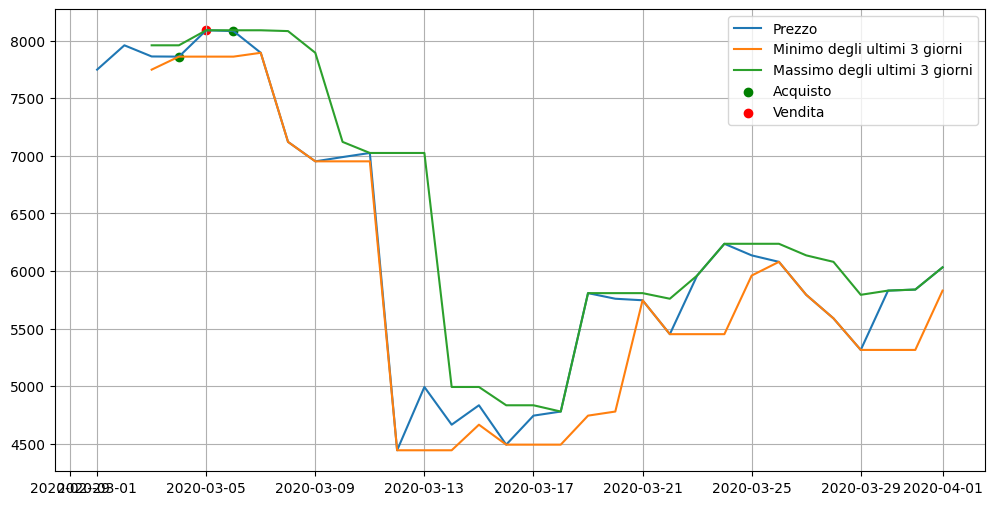

In [100]:
plt.figure(figsize=(12,6))
plt.plot(dati['Timestamp'], dati['Price'], label='Prezzo')
plt.plot(dati['Timestamp'], dati['Min'], label=f'Minimo degli ultimi {N} giorni')
plt.plot(dati['Timestamp'], dati['Max'], label=f'Massimo degli ultimi {N} giorni')
acquisti = tabella_finale[tabella_finale['Azione'] == 'Acquisto'].index
vendite = tabella_finale[tabella_finale['Azione'] == 'Vendita'].index
plt.scatter(dati['Timestamp'][acquisti], dati['Price'].iloc[acquisti], color='g', marker='o', label='Acquisto')
plt.scatter(dati['Timestamp'][vendite], dati['Price'].iloc[vendite], color='r', marker='o', label='Vendita')
plt.legend()
plt.grid()
plt.show()

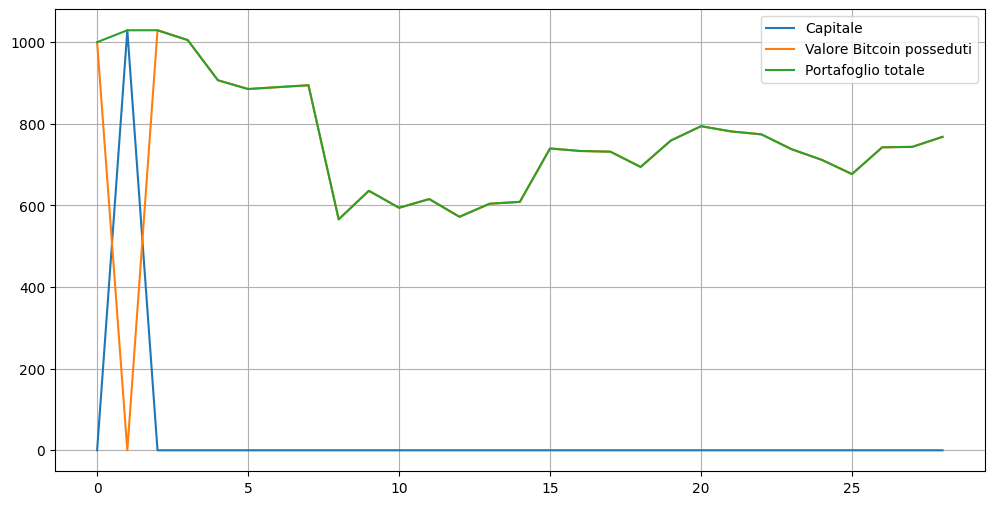

In [101]:
plt.figure(figsize=(12,6))
plt.plot(capitale_lista, label='Capitale')
plt.plot(valore_bitcoin_lista, label='Valore Bitcoin posseduti')
plt.plot(portafoglio_lista, label='Portafoglio totale')
plt.legend()
plt.grid()
plt.show()

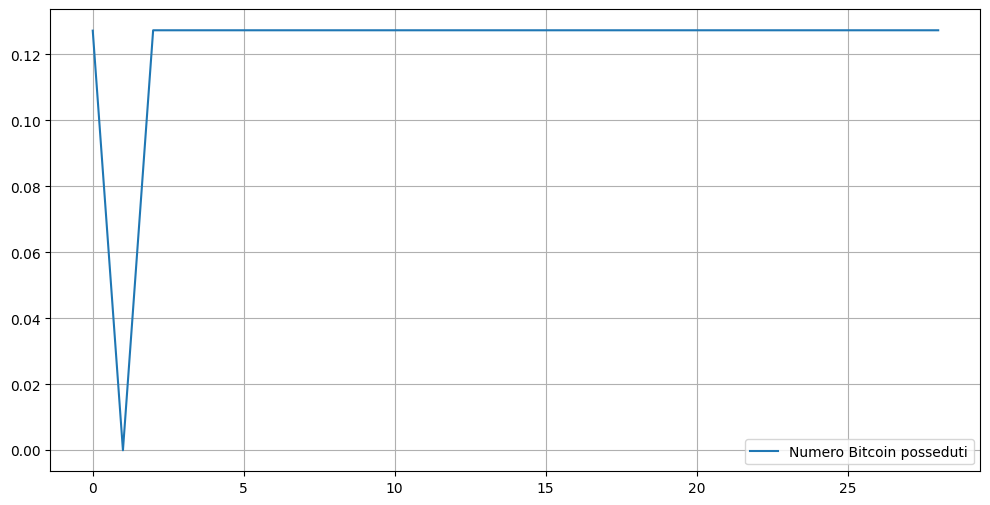

In [102]:
plt.figure(figsize=(12,6))
plt.plot(bitcoins_lista, label='Numero Bitcoin posseduti')
plt.legend()
plt.grid()
plt.show()

### Grid search

In [103]:
# Definisci i valori dei parametri per la grid search
N_values = np.arange(9, 14, 1)
scarto_minimo_values =  np.arange(0.05, 0.09, 0.01)
scarto_massimo_values =  np.arange(0, 0.05, 0.05)
perc_acquisto_values =  np.arange(1, 1.01, 0.05)
perc_vendita_values =  np.arange(1, 1.01, 0.02)
timeframe_values = np.arange(3, 5, 1)

# Crea tutte le combinazioni possibili dei parametri
combinazioni = list(itertools.product(N_values, scarto_minimo_values, scarto_massimo_values, perc_acquisto_values, perc_vendita_values, timeframe_values))

# Inizializza la tabella dei risultati
tabella_grid_search = pd.DataFrame(columns=['Data iniziale', 'Data finale', 'N', 'Scarto minimo', 'Scarto massimo', 'Perc acquisto', 'Perc vendita', 'Timeframe', 'Rendimento portafoglio'])

# Esegui la grid search
for cont, combinazione in enumerate(combinazioni):
    N, scarto_minimo, scarto_massimo, perc_acquisto, perc_vendita, timeframe = combinazione

    dati['Min'] = dati['Price'].rolling(window=N).min()
    dati['Max'] = dati['Price'].rolling(window=N).max()

    capitale = 1000
    bitcoins = 0
    ultima_azione = 'Vendita'
    prezzo_acquisto = 0
    acquisti_fatti = 0
    vendite_fatte = 0

    azioni = []
    ultime_azioni = []
    quantita_euro = []
    quantita_bitcoin = []
    capitale_lista = []
    bitcoins_lista = []
    valore_bitcoin_lista = []
    portafoglio_lista = []
    valore_quantita_euro = 0
    valore_quantita_bitcoin = 0
    azione = '-'

    for i in range(N, len(dati)):
        if i % timeframe == 0:
            if dati['Price'].iloc[i] < dati['Min'].iloc[i] * (1 + scarto_minimo) and ultima_azione == 'Vendita':
                prezzo_acquisto = dati['Price'].iloc[i]
                bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
                capitale -= prezzo_acquisto * bitcoins_acquistati
                bitcoins += bitcoins_acquistati
                azione = 'Acquisto'
                acquisti_fatti += 1
                ultima_azione = azione
                valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
                valore_quantita_bitcoin = bitcoins_acquistati
            elif dati['Price'].iloc[i] > dati['Max'].iloc[i] * (1 - scarto_massimo) and ultima_azione == 'Acquisto' and dati['Price'].iloc[i] > prezzo_acquisto:
                prezzo_vendita = dati['Price'].iloc[i]
                bitcoins_venduti = bitcoins * perc_vendita
                capitale += prezzo_vendita * bitcoins_venduti
                bitcoins -= bitcoins_venduti
                azione = 'Vendita'
                vendite_fatte += 1
                ultima_azione = azione
                valore_quantita_euro = prezzo_vendita * bitcoins_venduti
                valore_quantita_bitcoin = bitcoins_venduti
            else:
                azione = '-'
                valore_quantita_euro = 0
                valore_quantita_bitcoin = 0
        else:
            azione = '-'
            valore_quantita_euro = 0
            valore_quantita_bitcoin = 0

        # azioni.append(azione)
        # ultime_azioni.append(ultima_azione)
        # quantita_euro.append(valore_quantita_euro)
        # quantita_bitcoin.append(valore_quantita_bitcoin)
        # capitale_lista.append(capitale)
        # bitcoins_lista.append(bitcoins)
        # valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[i])
        portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[i])

    rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]

    # Aggiungi i risultati alla tabella
    nuova_riga = pd.DataFrame({
    'Data iniziale': [dati['Timestamp'].iloc[0]],
    'Data finale': [dati['Timestamp'].iloc[-1]],
    'N': [N],
    'Scarto minimo': [scarto_minimo],
    'Scarto massimo': [scarto_massimo],
    'Perc acquisto': [perc_acquisto],
    'Perc vendita': [perc_vendita],
    'Timeframe': [timeframe],
    'Rendimento portafoglio': [rendimento_portafoglio],
    'Acquisti fatti': [acquisti_fatti],
    'Vendite fatte': [vendite_fatte]
    })

    tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)

    migliore_combinazione = tabella_grid_search.loc[tabella_grid_search['Rendimento portafoglio'].idxmax()]

    print(f'\n\nCombinazione {cont+1}/{len(combinazioni)}:\n{nuova_riga}')
    print(f'\nCombinazione migliore trovata finora:\n{migliore_combinazione}')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_273632\3502706831.py:98: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)




Combinazione 1/40:
              Data iniziale               Data finale  N  Scarto minimo  Scarto massimo  Perc acquisto  Perc vendita  Timeframe  Rendimento portafoglio  Acquisti fatti  Vendite fatte
0 2020-03-01 00:00:00+00:00 2020-04-01 00:00:00+00:00  9           0.05             0.0            1.0           1.0          3                0.863066               1              0

Combinazione migliore trovata finora:
Data iniziale             2020-03-01 00:00:00+00:00
Data finale               2020-04-01 00:00:00+00:00
N                                                 9
Scarto minimo                                  0.05
Scarto massimo                                  0.0
Perc acquisto                                   1.0
Perc vendita                                    1.0
Timeframe                                         3
Rendimento portafoglio                     0.863066
Acquisti fatti                                  1.0
Vendite fatte                                   0.0
Na

In [104]:
tabella_grid_search.sort_values(by='Rendimento portafoglio', ascending=False)

,Data iniziale,Data finale,N,Scarto minimo,Scarto massimo,Perc acquisto,Perc vendita,Timeframe,Rendimento portafoglio,Acquisti fatti,Vendite fatte
20,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,11,0.07,0.0,1.0,1.0,3,1.342540,1.0,0.0
30,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,12,0.08,0.0,1.0,1.0,3,1.342540,1.0,0.0
18,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,11,0.06,0.0,1.0,1.0,3,1.342540,1.0,0.0
24,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,12,0.05,0.0,1.0,1.0,3,1.342540,1.0,0.0
16,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,11,0.05,0.0,1.0,1.0,3,1.342540,1.0,0.0
26,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,12,0.06,0.0,1.0,1.0,3,1.342540,1.0,0.0
14,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,10,0.08,0.0,1.0,1.0,3,1.342540,1.0,0.0
28,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,12,0.07,0.0,1.0,1.0,3,1.342540,1.0,0.0
12,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,10,0.07,0.0,1.0,1.0,3,1.342540,1.0,0.0
10,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,10,0.06,0.0,1.0,1.0,3,1.342540,1.0,0.0


### Simulazione del comportamento ideale

In [105]:
azioni = []
ultime_azioni = []
quantita_euro = []
quantita_bitcoin = []
capitale_lista = []
bitcoins_lista = []
valore_bitcoin_lista = []
portafoglio_lista = []
valore_quantita_euro = 0
valore_quantita_bitcoin = 0

capitale = capitale_iniziale
bitcoins = bitcoin_iniziali
comprato = False

for i in range(len(dati['Price']) - 1):
    # Compra al minimo
    if dati['Price'][i] < dati['Price'][i+1] and not comprato:
        prezzo_acquisto = dati['Price'][i]
        bitcoins_acquistati = capitale / prezzo_acquisto
        bitcoins += bitcoins_acquistati
        capitale = 0
        comprato = True
        azione = 'Acquisto'
        ultima_azione = azione
        valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
        valore_quantita_bitcoin = bitcoins_acquistati
    # Vende al massimo
    elif dati['Price'][i] > dati['Price'][i+1] and comprato:
        prezzo_vendita = dati['Price'].iloc[i]
        bitcoins_venduti = bitcoins
        capitale += prezzo_vendita * bitcoins_venduti
        bitcoins = 0
        comprato = False
        azione = 'Vendita'
        ultima_azione = azione
        valore_quantita_euro = prezzo_vendita * bitcoins_venduti
        valore_quantita_bitcoin = bitcoins_venduti
    else:
        azione = '-'
        valore_quantita_euro = 0
        valore_quantita_bitcoin = 0



    azioni.append(azione)
    ultime_azioni.append(ultima_azione)
    quantita_euro.append(valore_quantita_euro)
    quantita_bitcoin.append(valore_quantita_bitcoin)
    capitale_lista.append(capitale)
    bitcoins_lista.append(bitcoins)
    valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[i])
    portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[i])

# Vende i bitcoin rimasti all'ultimo prezzo
if comprato:
    bitcoins_venduti = bitcoins
    prezzo_vendita = dati['Price'].iloc[-1]
    capitale += prezzo_vendita * bitcoins_venduti
    bitcoins = 0
    comprato = False
    azione = 'Vendita'
    ultima_azione = azione
    valore_quantita_euro = prezzo_vendita * bitcoins_venduti
    valore_quantita_bitcoin = bitcoins_venduti
else:
    bitcoins_venduti = 0
    comprato = False
    azione = '-'
    valore_quantita_euro = 0
    valore_quantita_bitcoin = 0


azioni.append(azione)
ultime_azioni.append(ultima_azione)
quantita_euro.append(valore_quantita_euro)
quantita_bitcoin.append(valore_quantita_bitcoin)
capitale_lista.append(capitale)
bitcoins_lista.append(bitcoins)
valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[-1])
portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[-1])

# valore_iniziale = capitale_iniziale + bitcoin_iniziali * dati['Price'][0]
# valore_finale = capitale + bitcoin * dati['Price'].iloc[-1]

rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]


tabella_finale_ideale = pd.DataFrame({
    'Data': dati['Timestamp'],
    'Prezzo Bitcoin (€)': dati['Price'],
    'Azione': azioni,
    'Ultima azione': ultime_azioni,
    '€ acquistati/venduti': quantita_euro,
    'Bitcoin acquistati/venduti': quantita_bitcoin,
    'Capitale (€)': capitale_lista,
    'Bitcoin posseduti': bitcoins_lista,
    'Valore Bitcoin (€)': valore_bitcoin_lista,
    'Portafoglio totale (€)': portafoglio_lista
})

In [106]:
tabella_finale_ideale

,Data,Prezzo Bitcoin (€),Azione,Ultima azione,€ acquistati/venduti,Bitcoin acquistati/venduti,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
0,2020-03-01 00:00:00+00:00,7748.164551,Acquisto,Acquisto,1000.000000,0.129063,0.000000,0.129063,1000.000000,1000.000000
1,2020-03-02 00:00:00+00:00,7959.358398,Vendita,Vendita,1027.257274,0.129063,1027.257274,0.000000,0.000000,1027.257274
2,2020-03-03 00:00:00+00:00,7862.485352,-,Vendita,0.000000,0.000000,1027.257274,0.000000,0.000000,1027.257274
3,2020-03-04 00:00:00+00:00,7861.055176,Acquisto,Acquisto,1027.257274,0.130677,0.000000,0.130677,1027.257274,1027.257274
4,2020-03-05 00:00:00+00:00,8089.786133,Vendita,Vendita,1057.147096,0.130677,1057.147096,0.000000,0.000000,1057.147096
5,2020-03-06 00:00:00+00:00,8082.739746,-,Vendita,0.000000,0.000000,1057.147096,0.000000,0.000000,1057.147096
6,2020-03-07 00:00:00+00:00,7894.343750,-,Vendita,0.000000,0.000000,1057.147096,0.000000,0.000000,1057.147096
7,2020-03-08 00:00:00+00:00,7121.034180,-,Vendita,0.000000,0.000000,1057.147096,0.000000,0.000000,1057.147096
8,2020-03-09 00:00:00+00:00,6952.206055,Acquisto,Acquisto,1057.147096,0.152059,0.000000,0.152059,1057.147096,1057.147096
9,2020-03-10 00:00:00+00:00,6989.210938,-,Acquisto,0.000000,0.000000,0.000000,0.152059,1062.774030,1062.774030


In [107]:
tabella_finale_ideale[tabella_finale_ideale['Azione'] != '-']

,Data,Prezzo Bitcoin (€),Azione,Ultima azione,€ acquistati/venduti,Bitcoin acquistati/venduti,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
0,2020-03-01 00:00:00+00:00,7748.164551,Acquisto,Acquisto,1000.000000,0.129063,0.000000,0.129063,1000.000000,1000.000000
1,2020-03-02 00:00:00+00:00,7959.358398,Vendita,Vendita,1027.257274,0.129063,1027.257274,0.000000,0.000000,1027.257274
3,2020-03-04 00:00:00+00:00,7861.055176,Acquisto,Acquisto,1027.257274,0.130677,0.000000,0.130677,1027.257274,1027.257274
4,2020-03-05 00:00:00+00:00,8089.786133,Vendita,Vendita,1057.147096,0.130677,1057.147096,0.000000,0.000000,1057.147096
8,2020-03-09 00:00:00+00:00,6952.206055,Acquisto,Acquisto,1057.147096,0.152059,0.000000,0.152059,1057.147096,1057.147096
10,2020-03-11 00:00:00+00:00,7024.827637,Vendita,Vendita,1068.189878,0.152059,1068.189878,0.000000,0.000000,1068.189878
11,2020-03-12 00:00:00+00:00,4444.237305,Acquisto,Acquisto,1068.189878,0.240354,0.000000,0.240354,1068.189878,1068.189878
12,2020-03-13 00:00:00+00:00,4993.677246,Vendita,Vendita,1200.249924,0.240354,1200.249924,0.000000,0.000000,1200.249924
13,2020-03-14 00:00:00+00:00,4666.309570,Acquisto,Acquisto,1200.249924,0.257216,0.000000,0.257216,1200.249924,1200.249924
14,2020-03-15 00:00:00+00:00,4834.835938,Vendita,Vendita,1243.597619,0.257216,1243.597619,0.000000,0.000000,1243.597619


In [108]:
print(f'Rendimento del portafoglio: {round(rendimento_portafoglio,2)}')
print(f'Valore medio del portafoglio: {round(np.mean(portafoglio_lista),2)}€')
print(f'Controvalore finale bitcoin: {round(bitcoins_lista[-1] * dati["Price"].iloc[-1],2)}€')
print(f'Capitale finale: {round(capitale_lista[-1],2)}€')
print(f'Numero acquisti effettuati: {len(tabella_finale_ideale[tabella_finale_ideale["Azione"] == "Acquisto"])}')
print(f'Numero vendite effettuate: {len(tabella_finale_ideale[tabella_finale_ideale["Azione"] == "Vendita"])}')

Rendimento del portafoglio: 2.09
Valore medio del portafoglio: 1419.89€
Controvalore finale bitcoin: 0.0€
Capitale finale: 2086.93€
Numero acquisti effettuati: 8
Numero vendite effettuate: 8


In [109]:
rendimento_ideale_portafoglio = calcola_rendimento_ideale(capitale_iniziale, bitcoin_iniziali, dati['Price'])
print('Rendimento ideale del portafoglio e portafoglio ideale finale:', rendimento_ideale_portafoglio[0], rendimento_ideale_portafoglio[1])

Rendimento ideale del portafoglio e portafoglio ideale finale: 2.0869284007002427 2086.9284007002425


In [ ]:
# rendimento_spese

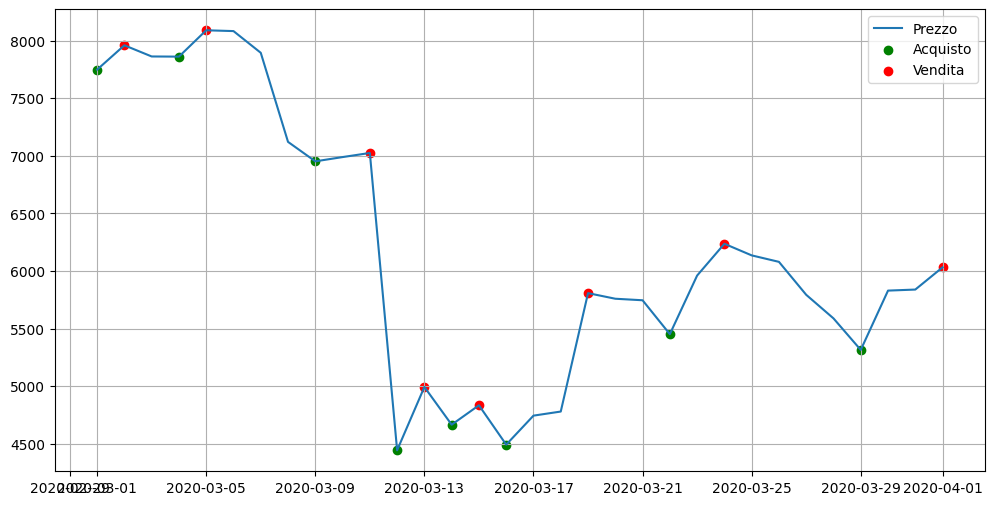

In [110]:
plt.figure(figsize=(12,6))
plt.plot(dati['Timestamp'], dati['Price'], label='Prezzo')
acquisti = tabella_finale_ideale[tabella_finale_ideale['Azione'] == 'Acquisto'].index
vendite = tabella_finale_ideale[tabella_finale_ideale['Azione'] == 'Vendita'].index
plt.scatter(dati['Timestamp'][acquisti], dati['Price'].iloc[acquisti], color='g', marker='o', label='Acquisto')
plt.scatter(dati['Timestamp'][vendite], dati['Price'].iloc[vendite], color='r', marker='o', label='Vendita')
plt.legend()
plt.grid()
plt.show()

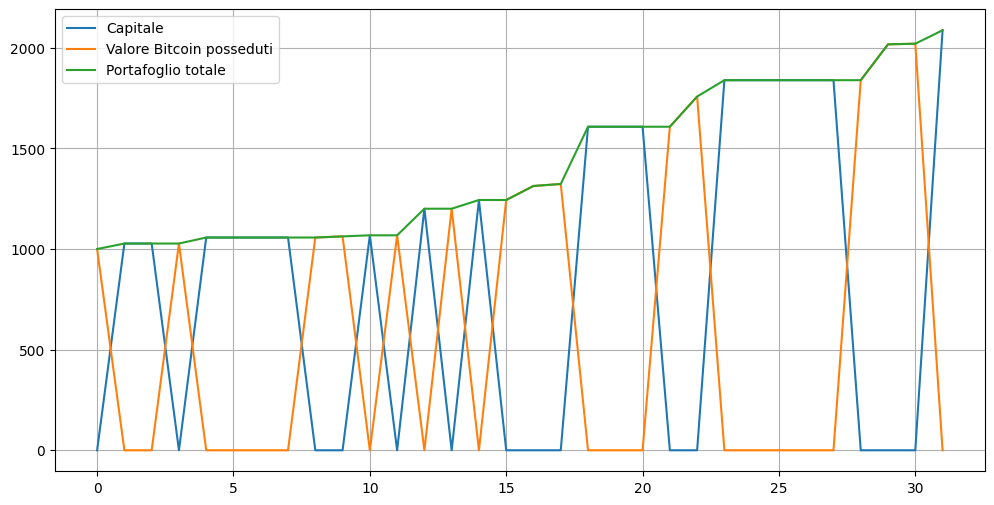

In [111]:
plt.figure(figsize=(12,6))
plt.plot(capitale_lista, label='Capitale')
plt.plot(valore_bitcoin_lista, label='Valore Bitcoin posseduti')
plt.plot(portafoglio_lista, label='Portafoglio totale')
plt.legend()
plt.grid()
plt.show()

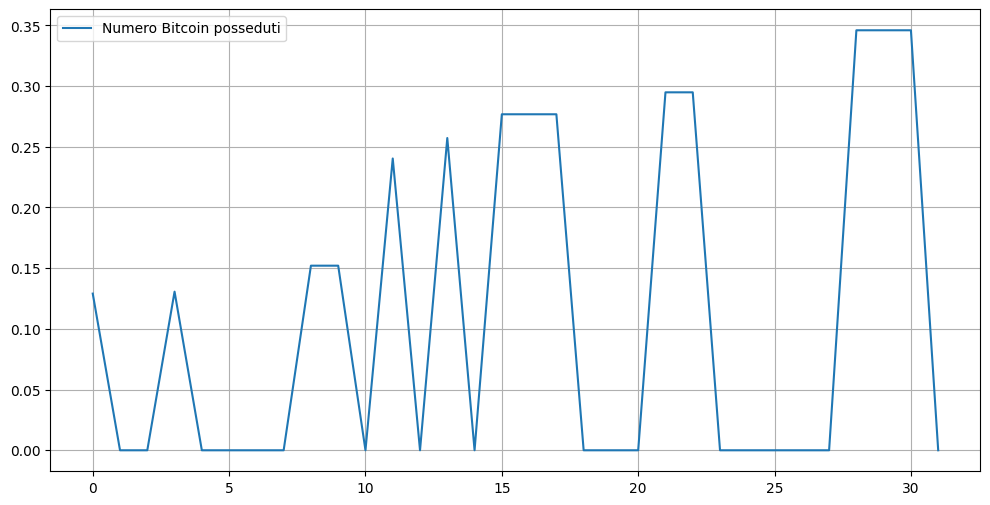

In [112]:
plt.figure(figsize=(12,6))
plt.plot(bitcoins_lista, label='Numero Bitcoin posseduti')
plt.legend()
plt.grid()
plt.show()

## Simulazione singola su più periodi casuali

In [4]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati.rename(columns={'Date':'Timestamp', 'Close':'Price'}, inplace=True)
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati = dati[['Timestamp', 'Price']]
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


In [5]:
# Definisci le variabili per gli estremi di estrazione e la dimensione minima del periodo
data_inizio = '2021-01-09'
data_fine = '2023-12-03'
dimensione_minima_periodo = 30

# Converti le date in formato datetime
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])

# Filtra i dati nel range di date desiderato
dati = dati[(dati['Timestamp'] >= data_inizio) & (dati['Timestamp'] <= data_fine)].reset_index(drop=True)
dati

,Timestamp,Price
0,2021-01-09 00:00:00+00:00,32928.058594
1,2021-01-10 00:00:00+00:00,31472.685547
2,2021-01-11 00:00:00+00:00,29247.208984
3,2021-01-12 00:00:00+00:00,27786.228516
4,2021-01-13 00:00:00+00:00,30682.929688
...,...,...
1054,2023-11-29 00:00:00+00:00,34379.074219
1055,2023-11-30 00:00:00+00:00,34499.992188
1056,2023-12-01 00:00:00+00:00,34625.015625
1057,2023-12-02 00:00:00+00:00,35518.437500


<h6> Grafico dei dati </h6>

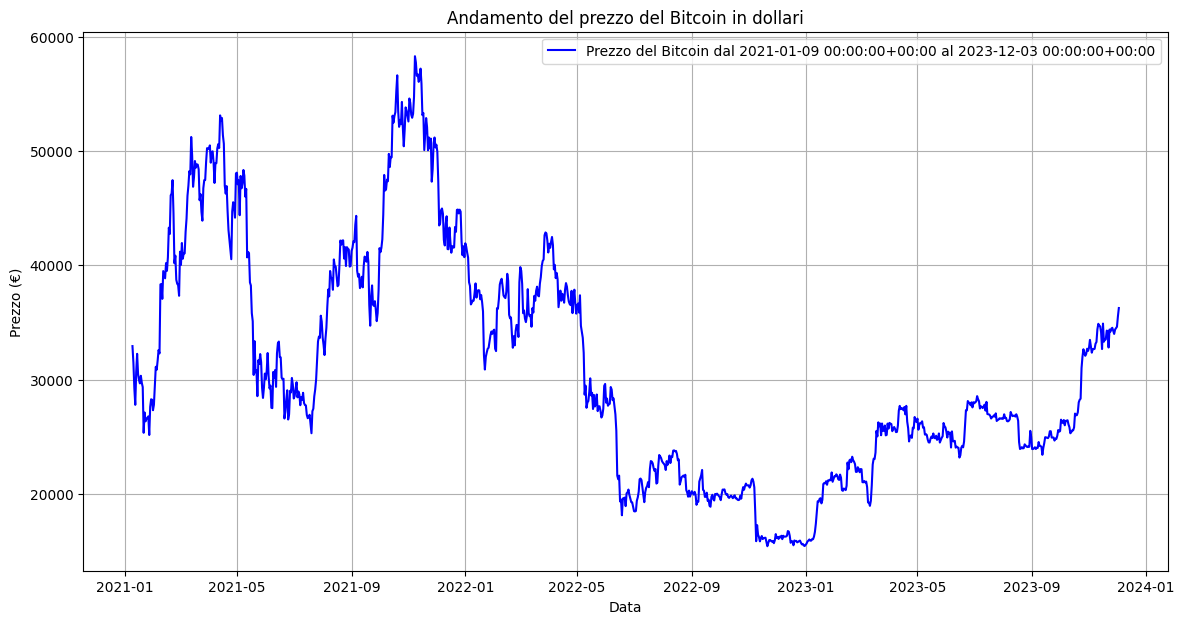

In [6]:
x = dati['Timestamp']
y = dati['Price']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Prezzo del Bitcoin dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Andamento del prezzo del Bitcoin in dollari')
plt.xlabel('Data')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
def periodo_casuale(data_iniziale: str, data_finale: str, lunghezza_minima: int):
    formato_data = "%Y-%m-%d"  # ad esempio "2024-02-23"
    
    # Converte le date in oggetti datetime
    data_iniziale = datetime.strptime(data_iniziale, formato_data)
    data_finale = datetime.strptime(data_finale, formato_data)
    
    # Calcola il numero di giorni tra le due date
    giorni_totali = (data_finale - data_iniziale).days
    
    if giorni_totali < lunghezza_minima:
        raise ValueError("La lunghezza minima del periodo è maggiore del numero totale di giorni disponibili.")
    
    # Sceglie un giorno casuale per l'inizio del periodo
    inizio_periodo = data_iniziale + timedelta(days=random.randint(0, giorni_totali - lunghezza_minima))
    
    # Sceglie un giorno casuale per la fine del periodo, che deve essere almeno lunghezza_minima giorni dopo l'inizio
    fine_periodo = inizio_periodo + timedelta(days=random.randint(lunghezza_minima, giorni_totali - (inizio_periodo - data_iniziale).days))
    
    # Converte le date del periodo in stringhe
    inizio_periodo = inizio_periodo.strftime(formato_data)
    fine_periodo = fine_periodo.strftime(formato_data)
    
    return inizio_periodo, fine_periodo

In [9]:
# Prova
data_inizio_casuale, data_fine_casuale = periodo_casuale(data_inizio, data_fine, dimensione_minima_periodo)
data_inizio_casuale, data_fine_casuale

('2023-03-23', '2023-08-09')

In [10]:
# Numero di periodi da estrarre
N_dati = 100

# Lista per salvare le date casuali scelte
lista_date_casuali = []

# Lista per salvare i rendimenti dei portafogli
rendimenti_portafoglio = []

# Estrai N_dati periodi casuali dal dataset
for _ in range(N_dati):
    # Scegli una data di inizio casuale e una data di fine casuale
    data_inizio_casuale, data_fine_casuale = periodo_casuale(data_inizio, data_fine, dimensione_minima_periodo)
    
    # Estrai il periodo di dati
    dati_periodo = dati[(dati['Timestamp'] >= data_inizio_casuale) & (dati['Timestamp'] <= data_fine_casuale)]

    # Salvo le date casuali scelte
    lista_date_casuali.append((data_inizio_casuale, data_fine_casuale))



    
    # Esegui la tua strategia di trading sui dati del periodo
    capitale = 1000
    bitcoins = 0
    ultima_azione = 'Vendita'

    scarto_minimo = 0.05
    scarto_massimo = 0
    perc_acquisto = 1
    perc_vendita = 0.1
    timeframe = 3
    N = 5
    dati_periodo['Min'] = dati_periodo['Price'].rolling(window=N).min()
    dati_periodo['Max'] = dati_periodo['Price'].rolling(window=N).max()


    portafoglio_lista = []
    valore_quantita_euro = 0
    valore_quantita_bitcoin = 0
    azione = '-'

    for i in range(N, len(dati_periodo)):
        if i % timeframe == 0:
            if dati_periodo['Price'].iloc[i] < dati_periodo['Min'].iloc[i] * (1 + scarto_minimo) and ultima_azione == 'Vendita':
                prezzo_acquisto = dati_periodo['Price'].iloc[i]
                bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
                capitale -= prezzo_acquisto * bitcoins_acquistati
                bitcoins += bitcoins_acquistati
                azione = 'Acquisto'
                ultima_azione = azione
                valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
                valore_quantita_bitcoin = bitcoins_acquistati
            elif dati_periodo['Price'].iloc[i] > dati_periodo['Max'].iloc[i] * (1 - scarto_massimo) and ultima_azione == 'Acquisto' and dati_periodo['Price'].iloc[i] > prezzo_acquisto:
                prezzo_vendita = dati_periodo['Price'].iloc[i]
                bitcoins_venduti = bitcoins * perc_vendita
                capitale += prezzo_vendita * bitcoins_venduti
                bitcoins -= bitcoins_venduti
                azione = 'Vendita'
                ultima_azione = azione
                valore_quantita_euro = prezzo_vendita * bitcoins_venduti
                valore_quantita_bitcoin = bitcoins_venduti
            else:
                azione = '-'
                valore_quantita_euro = 0
                valore_quantita_bitcoin = 0
        else:
            azione = '-'
            valore_quantita_euro = 0
            valore_quantita_bitcoin = 0

        portafoglio_lista.append(capitale + bitcoins * dati_periodo['Price'].iloc[i])



    # Calcola il rendimento del portafoglio per il periodo
    rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]
    
    # Aggiungi il rendimento del portafoglio alla lista dei rendimenti
    rendimenti_portafoglio.append(rendimento_portafoglio)

# Calcola il rendimento medio del portafoglio
rendimento_medio_portafoglio = np.mean(rendimenti_portafoglio)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_12664\3108347538.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_periodo['Min'] = dati_periodo['Price'].rolling(window=N).min()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_12664\3108347538.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dati_periodo['Max'] = dati_periodo['Price'].rolling(window=N).max()
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_12664\3108347538.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [11]:
rendimento_medio_portafoglio

0.9778598340458412

In [12]:
lista_date_casuali

[('2023-02-16', '2023-05-06'),
 ('2023-07-14', '2023-10-02'),
 ('2021-01-17', '2022-02-27'),
 ('2023-02-08', '2023-09-26'),
 ('2022-07-07', '2022-08-27'),
 ('2021-05-30', '2023-09-29'),
 ('2022-08-11', '2023-07-18'),
 ('2023-02-09', '2023-03-24'),
 ('2021-12-04', '2022-06-18'),
 ('2021-04-24', '2021-10-31'),
 ('2022-07-28', '2023-09-04'),
 ('2023-04-21', '2023-07-01'),
 ('2022-01-30', '2022-08-17'),
 ('2021-11-16', '2022-09-21'),
 ('2022-09-13', '2022-10-23'),
 ('2022-09-28', '2023-02-14'),
 ('2023-10-10', '2023-11-24'),
 ('2023-03-01', '2023-09-21'),
 ('2023-03-02', '2023-09-05'),
 ('2022-07-27', '2023-02-20'),
 ('2023-07-18', '2023-09-30'),
 ('2021-02-19', '2022-01-05'),
 ('2022-03-10', '2022-11-27'),
 ('2021-05-13', '2023-11-30'),
 ('2023-08-16', '2023-11-01'),
 ('2022-05-15', '2022-10-28'),
 ('2021-06-26', '2022-09-16'),
 ('2021-01-25', '2021-06-09'),
 ('2023-10-13', '2023-11-18'),
 ('2021-12-04', '2022-10-21'),
 ('2022-06-29', '2023-10-06'),
 ('2022-09-04', '2023-11-16'),
 ('2023-

<h6> Grafico di uno dei periodi casuali </h6>

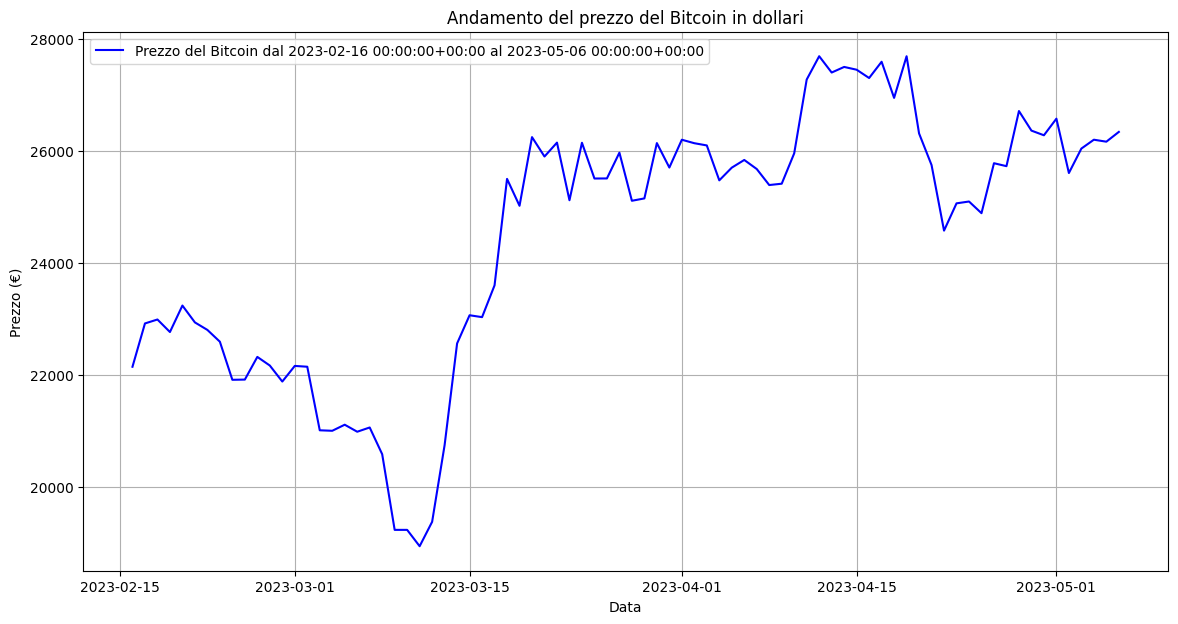

In [13]:
periodo_scelto = lista_date_casuali[0]
dati_periodo = dati[(dati['Timestamp'] >= periodo_scelto[0]) & (dati['Timestamp'] <= periodo_scelto[1])]
x = dati_periodo['Timestamp']
y = dati_periodo['Price']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Prezzo del Bitcoin dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Andamento del prezzo del Bitcoin in dollari')
plt.xlabel('Data')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.grid(True)
plt.show()

### Grid search su più periodi casuali

In [25]:
# Definisci i valori dei parametri per la grid search
N_values = [2,3,4]
scarto_minimo_values =  [0.04,0.05,0.06]
scarto_massimo_values =  [0.03,0.04,0.05]
perc_acquisto_values =  [0.13, 0.14, 0.15, 0.16, 0.17]
perc_vendita_values =  [0, 0.01, 0.02]
timeframe_values = [1,2]

# Crea tutte le combinazioni possibili dei parametri
combinazioni = list(itertools.product(N_values, scarto_minimo_values, scarto_massimo_values, perc_acquisto_values, perc_vendita_values, timeframe_values))

# Inizializza la tabella dei risultati
tabella_grid_search = pd.DataFrame(columns=['Data iniziale', 'Data finale', 'N', 'Scarto minimo', 'Scarto massimo', 'Perc acquisto', 'Perc vendita', 'Timeframe', 'Rendimento medio portafoglio'])

# Numero di periodi da estrarre
N_dati = 100

# Esegui la grid search
for cont, combinazione in enumerate(combinazioni):
    N, scarto_minimo, scarto_massimo, perc_acquisto, perc_vendita, timeframe = combinazione

    # Lista per salvare i rendimenti dei portafogli
    rendimenti_portafoglio = []

    # Estrai N_dati periodi casuali dal dataset
    for _ in range(N_dati):
        # Scegli una data di inizio casuale e una data di fine casuale
        data_inizio_casuale, data_fine_casuale = periodo_casuale(data_inizio, data_fine, dimensione_minima_periodo)

        # Estrai il periodo di dati
        dati_periodo = dati[(dati['Timestamp'] >= data_inizio_casuale) & (dati['Timestamp'] <= data_fine_casuale)].copy() # Ho dovuto aggiungere il .copy per evitare messaggi di avviso fastidiosi (SettingWithCopyWarning)

        # Esegui la tua strategia di trading sui dati del periodo
        capitale = 1000
        bitcoins = 0
        ultima_azione = 'Vendita'
        prezzo_acquisto = 0

        dati_periodo['Min'] = dati_periodo['Price'].rolling(window=N).min()

        dati_periodo['Max'] = dati_periodo['Price'].rolling(window=N).max()

        portafoglio_lista = []

        for i in range(N, len(dati_periodo)):
            if i % timeframe == 0:
                if dati_periodo['Price'].iloc[i] < dati_periodo['Min'].iloc[i] * (1 + scarto_minimo) and ultima_azione == 'Vendita':
                    prezzo_acquisto = dati_periodo['Price'].iloc[i]
                    bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
                    capitale -= prezzo_acquisto * bitcoins_acquistati
                    bitcoins += bitcoins_acquistati
                    ultima_azione = 'Acquisto'
                elif dati_periodo['Price'].iloc[i] > dati_periodo['Max'].iloc[i] * (1 - scarto_massimo) and ultima_azione == 'Acquisto' and dati_periodo['Price'].iloc[i] > prezzo_acquisto:
                    prezzo_vendita = dati_periodo['Price'].iloc[i]
                    bitcoins_venduti = bitcoins * perc_vendita
                    capitale += prezzo_vendita * bitcoins_venduti
                    bitcoins -= bitcoins_venduti
                    ultima_azione = 'Vendita'

            portafoglio_lista.append(capitale + bitcoins * dati_periodo['Price'].iloc[i])

        # Calcola il rendimento del portafoglio per il periodo
        rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]

        # Aggiungi il rendimento del portafoglio alla lista dei rendimenti
        rendimenti_portafoglio.append(rendimento_portafoglio)

    # Calcola il rendimento medio del portafoglio
    rendimento_medio_portafoglio = np.mean(rendimenti_portafoglio)

    # Aggiungi i risultati alla tabella
    nuova_riga = pd.DataFrame({
    'Data iniziale': [dati_periodo['Timestamp'].iloc[0]],
    'Data finale': [dati_periodo['Timestamp'].iloc[-1]],
    'N': [N],
    'Scarto minimo': [scarto_minimo],
    'Scarto massimo': [scarto_massimo],
    'Perc acquisto': [perc_acquisto],
    'Perc vendita': [perc_vendita],
    'Timeframe': [timeframe],
    'Rendimento medio portafoglio': [rendimento_medio_portafoglio]
    })

    tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)

    migliore_combinazione = tabella_grid_search.loc[tabella_grid_search['Rendimento medio portafoglio'].idxmax()]

    print(f'\n\nCombinazione {cont+1}/{len(combinazioni)}:\n{nuova_riga}')
    print(f'\nCombinazione migliore trovata finora:\n{migliore_combinazione}')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_12664\674120177.py:84: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)




Combinazione 1/810:
              Data iniziale               Data finale  N  Scarto minimo  \
0 2021-02-16 00:00:00+00:00 2023-10-08 00:00:00+00:00  2           0.04   

   Scarto massimo  Perc acquisto  Perc vendita  Timeframe  \
0            0.03           0.13             0          1   

   Rendimento medio portafoglio  
0                      0.950525  

Combinazione migliore trovata finora:
Data iniziale                   2021-02-16 00:00:00+00:00
Data finale                     2023-10-08 00:00:00+00:00
N                                                       2
Scarto minimo                                        0.04
Scarto massimo                                       0.03
Perc acquisto                                        0.13
Perc vendita                                            0
Timeframe                                               1
Rendimento medio portafoglio                     0.950525
Name: 0, dtype: object


Combinazione 2/810:
              Data iniziale   

In [26]:
tabella_grid_search.sort_values(by='Rendimento medio portafoglio', ascending=False)
# 1.054539

,Data iniziale,Data finale,N,Scarto minimo,Scarto massimo,Perc acquisto,Perc vendita,Timeframe,Rendimento medio portafoglio
86,2021-07-12 00:00:00+00:00,2022-09-23 00:00:00+00:00,2,0.04,0.05,0.17,0.01,1,1.036344
84,2021-05-03 00:00:00+00:00,2023-03-15 00:00:00+00:00,2,0.04,0.05,0.17,0,1,1.028305
266,2021-11-05 00:00:00+00:00,2022-12-10 00:00:00+00:00,2,0.06,0.05,0.17,0.01,1,1.026240
696,2021-04-06 00:00:00+00:00,2022-07-24 00:00:00+00:00,4,0.05,0.05,0.14,0,1,1.022244
208,2021-02-23 00:00:00+00:00,2023-10-24 00:00:00+00:00,2,0.06,0.03,0.17,0.02,1,1.021541
...,...,...,...,...,...,...,...,...,...
404,2023-05-21 00:00:00+00:00,2023-08-25 00:00:00+00:00,3,0.05,0.04,0.15,0.01,1,0.897022
319,2023-09-01 00:00:00+00:00,2023-10-11 00:00:00+00:00,3,0.04,0.04,0.16,0,2,0.892287
601,2021-05-25 00:00:00+00:00,2022-06-03 00:00:00+00:00,4,0.04,0.05,0.13,0,2,0.892163
509,2021-06-16 00:00:00+00:00,2023-05-16 00:00:00+00:00,3,0.06,0.04,0.17,0.02,2,0.891760


## Simulazione singola con variante (uso la media tra minimo e massimo come riferimento)

In [225]:
dati = pd.read_csv('Bitcoin (€) da yfinance dal 17-09-2014 al 24-04-2024.csv')
dati.rename(columns={'Date':'Timestamp', 'Close':'Price'}, inplace=True)
dati['Timestamp'] = pd.to_datetime(dati['Timestamp'])
dati = dati[['Timestamp', 'Price']]
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


<h6> Eventuale cambio dati </h6>

In [226]:
def calcola_prezzo(t):
    return dati['Price'][t]

In [227]:
dati['Price'] = dati.index.map(calcola_prezzo)
dati

,Timestamp,Price
0,2014-09-17 00:00:00+00:00,355.957367
1,2014-09-18 00:00:00+00:00,328.539368
2,2014-09-19 00:00:00+00:00,307.761139
3,2014-09-20 00:00:00+00:00,318.758972
4,2014-09-21 00:00:00+00:00,310.632446
...,...,...
3503,2024-04-20 00:00:00+00:00,59876.710938
3504,2024-04-21 00:00:00+00:00,60956.074219
3505,2024-04-22 00:00:00+00:00,60919.242188
3506,2024-04-23 00:00:00+00:00,62729.296875


<h6> Scelta periodo </h6>

In [228]:
data_inizio = '2020-03-01'
data_fine = '2021-03-01'

data1 = datetime.strptime(data_inizio, '%Y-%m-%d')
data2 = datetime.strptime(data_fine, '%Y-%m-%d')
indice_inizio = dati[dati['Timestamp'] == data_inizio].index[0]
indice_fine = dati[dati['Timestamp'] == data_fine].index[0]
dati = dati[indice_inizio:indice_fine + 1]
dati = dati.reset_index(drop=True)
dati

,Timestamp,Price
0,2020-03-01 00:00:00+00:00,7748.164551
1,2020-03-02 00:00:00+00:00,7959.358398
2,2020-03-03 00:00:00+00:00,7862.485352
3,2020-03-04 00:00:00+00:00,7861.055176
4,2020-03-05 00:00:00+00:00,8089.786133
...,...,...
361,2021-02-25 00:00:00+00:00,38735.164062
362,2021-02-26 00:00:00+00:00,38385.910156
363,2021-02-27 00:00:00+00:00,38260.480469
364,2021-02-28 00:00:00+00:00,37332.503906


<h6> Grafico dati </h6>

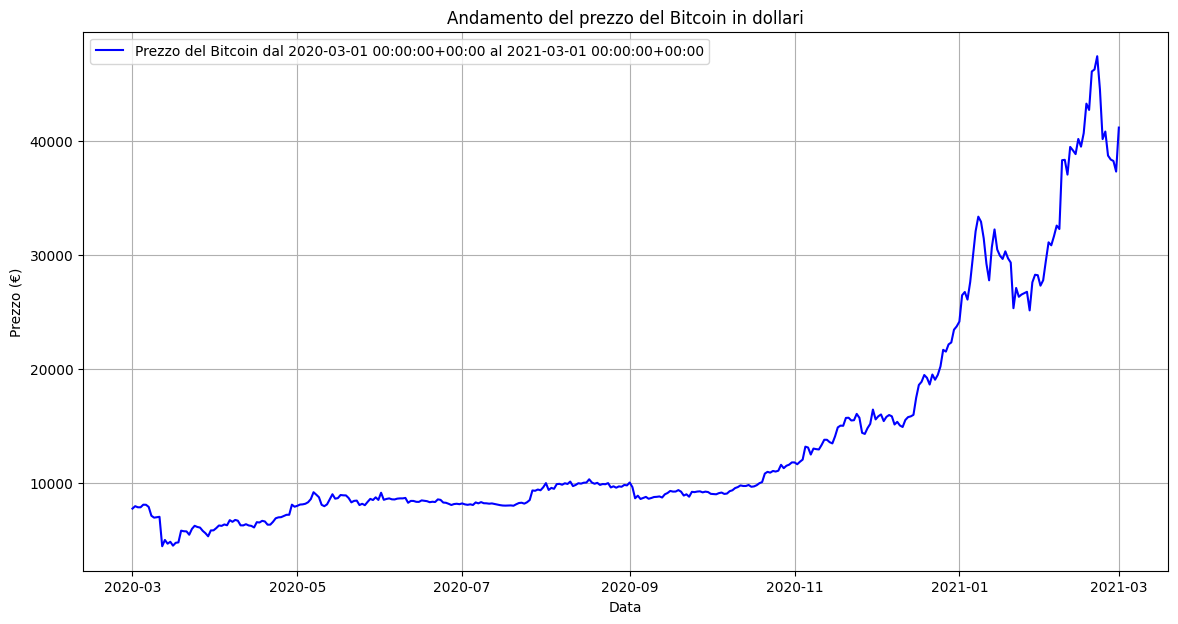

In [229]:
x = dati['Timestamp']
y = dati['Price']

plt.figure(figsize=(14, 7))
plt.plot(x, y, label=f"Prezzo del Bitcoin dal {str(x.iloc[0])} al {str(x.iloc[-1])}", color='blue')
plt.title('Andamento del prezzo del Bitcoin in dollari')
plt.xlabel('Data')
plt.ylabel('Prezzo (€)')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
dati['Price'].std()

9608.01122240184

<h6> Simulazione </h6>

In [231]:
def periodo_medio(prezzi):
    # Troviamo gli indici dei massimi locali
    indici_picchi = argrelextrema(prezzi, np.greater)

    # Calcoliamo le differenze tra gli indici dei picchi consecutivi
    differenze = np.diff(indici_picchi)

    # Calcoliamo il periodo medio di oscillazione
    periodo_medio = np.mean(differenze)

    # print("Il periodo medio di oscillazione degli ultimi 20 giorni è", periodo_medio)

    return periodo_medio

In [232]:
capitale_iniziale = 1000
bitcoin_iniziali = 0
capitale = capitale_iniziale
bitcoins = bitcoin_iniziali
ultima_azione = 'Vendita'


N = 1
scarto_da_minimo_a_media = 0.4 # se è 0, l'acquisto avviene quando il prezzo è minore o uguale al minimo degli ultimi N giorni (cioè quando c'è un nuovo minimo rispetto agli ultimi N giorni); se è 1, l'acquisto avviene quando il prezzo è strettamente minore della media tra minimo e massimo degli ultimi N giorni
scarto_da_massimo_a_media = 0.05 # se è 0, la vendita avviene quando il prezzo è maggiore o uguale al massimo degli ultimi N giorni (cioè quando c'è un nuovo massimo rispetto agli ultimi N giorni); se è 1, la vendita avviene quando il prezzo è strettamente maggiore della media tra minimo e massimo degli ultimi N giorni
perc_acquisto = 1
perc_vendita = 1
timeframe = 16
dati['Min'] = dati['Price'].rolling(window=N).min()
dati['Max'] = dati['Price'].rolling(window=N).max()
dati['Media tra minimo e massimo'] = (dati['Min'] + dati['Max']) / 2
# N_periodo_medio = 30

azioni = []
ultime_azioni = []
quantita_euro = []
quantita_bitcoin = []
capitale_lista = []
bitcoins_lista = []
valore_bitcoin_lista = []
portafoglio_lista = []
valore_quantita_euro = 0
valore_quantita_bitcoin = 0
azione = '-'

for i in range(N, len(dati)):
    if i % timeframe == 0:
        if dati['Price'].iloc[i] <= dati['Min'].iloc[i] + scarto_da_minimo_a_media * (dati['Media tra minimo e massimo'].iloc[i] - dati['Min'].iloc[i]) and ultima_azione == 'Vendita':
            prezzo_acquisto = dati['Price'].iloc[i]
            bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
            capitale -= prezzo_acquisto * bitcoins_acquistati
            bitcoins += bitcoins_acquistati
            azione = 'Acquisto'
            ultima_azione = azione
            valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
            valore_quantita_bitcoin = bitcoins_acquistati
        elif dati['Price'].iloc[i] >= dati['Max'].iloc[i] - scarto_da_minimo_a_media * (dati['Max'].iloc[i] - dati['Media tra minimo e massimo'].iloc[i]) and ultima_azione == 'Acquisto' and dati['Price'].iloc[i] > prezzo_acquisto:
            prezzo_vendita = dati['Price'].iloc[i]
            bitcoins_venduti = bitcoins * perc_vendita
            capitale += prezzo_vendita * bitcoins_venduti
            bitcoins -= bitcoins_venduti
            azione = 'Vendita'
            ultima_azione = azione
            valore_quantita_euro = prezzo_vendita * bitcoins_venduti
            valore_quantita_bitcoin = bitcoins_venduti
        else:
            azione = '-'
            valore_quantita_euro = 0
            valore_quantita_bitcoin = 0
    else:
        azione = '-'
        valore_quantita_euro = 0
        valore_quantita_bitcoin = 0
    
    azioni.append(azione)
    ultime_azioni.append(ultima_azione)
    quantita_euro.append(valore_quantita_euro)
    quantita_bitcoin.append(valore_quantita_bitcoin)
    capitale_lista.append(capitale)
    bitcoins_lista.append(bitcoins)
    valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[i])
    portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[i])


rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]


tabella_finale = pd.DataFrame({
    'Data': dati['Timestamp'].iloc[N:],
    'Prezzo Bitcoin (€)': dati['Price'].iloc[N:],
    'Min': dati['Min'].iloc[N:],
    'Max': dati['Max'].iloc[N:],
    'Azione': azioni,
    'Ultima azione': ultime_azioni,
    '€ acquistati/venduti': quantita_euro,
    'Bitcoin acquistati/venduti': quantita_bitcoin,
    'Capitale (€)': capitale_lista,
    'Bitcoin posseduti': bitcoins_lista,
    'Valore Bitcoin (€)': valore_bitcoin_lista,
    'Portafoglio totale (€)': portafoglio_lista
})

In [233]:
tabella_finale

,Data,Prezzo Bitcoin (€),Min,Max,Azione,Ultima azione,€ acquistati/venduti,Quantità Bitcoin,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
1,2020-03-02 00:00:00+00:00,7959.358398,7959.358398,7959.358398,-,Vendita,0.0,0.0,1000.000000,0.0,0.0,1000.000000
2,2020-03-03 00:00:00+00:00,7862.485352,7862.485352,7862.485352,-,Vendita,0.0,0.0,1000.000000,0.0,0.0,1000.000000
3,2020-03-04 00:00:00+00:00,7861.055176,7861.055176,7861.055176,-,Vendita,0.0,0.0,1000.000000,0.0,0.0,1000.000000
4,2020-03-05 00:00:00+00:00,8089.786133,8089.786133,8089.786133,-,Vendita,0.0,0.0,1000.000000,0.0,0.0,1000.000000
5,2020-03-06 00:00:00+00:00,8082.739746,8082.739746,8082.739746,-,Vendita,0.0,0.0,1000.000000,0.0,0.0,1000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
361,2021-02-25 00:00:00+00:00,38735.164062,38735.164062,38735.164062,-,Vendita,0.0,0.0,4579.998264,0.0,0.0,4579.998264
362,2021-02-26 00:00:00+00:00,38385.910156,38385.910156,38385.910156,-,Vendita,0.0,0.0,4579.998264,0.0,0.0,4579.998264
363,2021-02-27 00:00:00+00:00,38260.480469,38260.480469,38260.480469,-,Vendita,0.0,0.0,4579.998264,0.0,0.0,4579.998264
364,2021-02-28 00:00:00+00:00,37332.503906,37332.503906,37332.503906,-,Vendita,0.0,0.0,4579.998264,0.0,0.0,4579.998264


In [234]:
tabella_finale[tabella_finale['Azione'] != '-']

,Data,Prezzo Bitcoin (€),Min,Max,Azione,Ultima azione,€ acquistati/venduti,Quantità Bitcoin,Capitale (€),Bitcoin posseduti,Valore Bitcoin (€),Portafoglio totale (€)
16,2020-03-17 00:00:00+00:00,4744.934082,4744.934082,4744.934082,Acquisto,Acquisto,1000.000000,0.210751,0.000000,0.210751,1000.000000,1000.000000
32,2020-04-02 00:00:00+00:00,6264.632324,6264.632324,6264.632324,Vendita,Vendita,1320.278051,0.210751,1320.278051,0.000000,0.000000,1320.278051
48,2020-04-18 00:00:00+00:00,6673.713379,6673.713379,6673.713379,Acquisto,Acquisto,1320.278051,0.197833,0.000000,0.197833,1320.278051,1320.278051
64,2020-05-04 00:00:00+00:00,8173.670898,8173.670898,8173.670898,Vendita,Vendita,1617.018543,0.197833,1617.018543,0.000000,0.000000,1617.018543
80,2020-05-20 00:00:00+00:00,8673.226562,8673.226562,8673.226562,Acquisto,Acquisto,1617.018543,0.186438,0.000000,0.186438,1617.018543,1617.018543
160,2020-08-08 00:00:00+00:00,9970.475586,9970.475586,9970.475586,Vendita,Vendita,1858.874986,0.186438,1858.874986,0.000000,0.000000,1858.874986
176,2020-08-24 00:00:00+00:00,9983.125977,9983.125977,9983.125977,Acquisto,Acquisto,1858.874986,0.186202,0.000000,0.186202,1858.874986,1858.874986
240,2020-10-27 00:00:00+00:00,11589.126953,11589.126953,11589.126953,Vendita,Vendita,2157.915092,0.186202,2157.915092,0.000000,0.000000,2157.915092
256,2020-11-12 00:00:00+00:00,13789.074219,13789.074219,13789.074219,Acquisto,Acquisto,2157.915092,0.156495,0.000000,0.156495,2157.915092,2157.915092
272,2020-11-28 00:00:00+00:00,14809.243164,14809.243164,14809.243164,Vendita,Vendita,2317.565981,0.156495,2317.565981,0.000000,0.000000,2317.565981


In [235]:
print(f'Rendimento del portafoglio: {round(rendimento_portafoglio,2)}')
print(f'Valore medio del portafoglio: {round(np.mean(portafoglio_lista),2)}€')
print(f'Controvalore finale bitcoin: {round(bitcoins_lista[-1] * dati["Price"].iloc[-1],2)}€')
print(f'Capitale finale: {round(capitale_lista[-1],2)}€')
print(f'Numero acquisti effettuati: {len(tabella_finale[tabella_finale["Azione"] == "Acquisto"])}')
print(f'Numero vendite effettuate: {len(tabella_finale[tabella_finale["Azione"] == "Vendita"])}')

Rendimento del portafoglio: 4.58
Valore medio del portafoglio: 2079.33€
Controvalore finale bitcoin: 0.0€
Capitale finale: 4580.0€
Numero acquisti effettuati: 7
Numero vendite effettuate: 7


In [236]:
# rendimento_spese

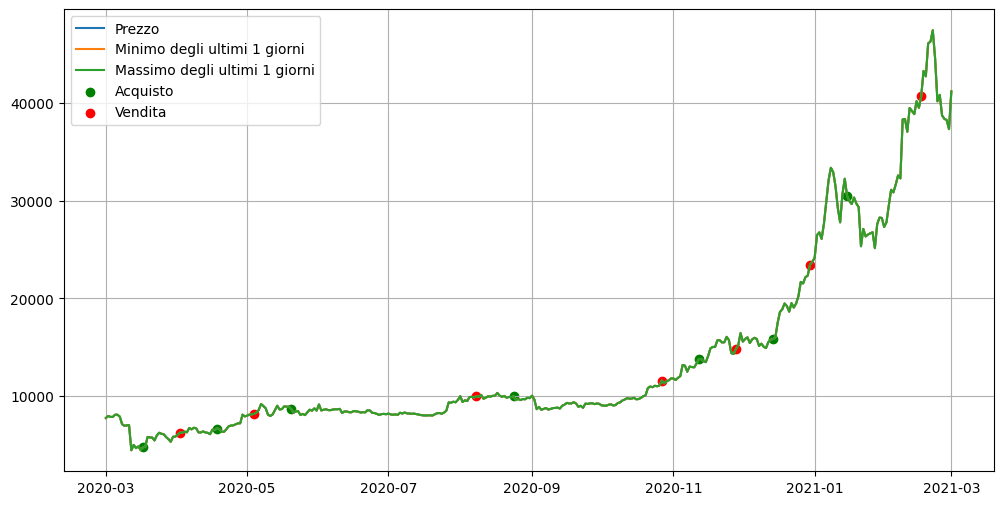

In [237]:
plt.figure(figsize=(12,6))
plt.plot(dati['Timestamp'], dati['Price'], label='Prezzo')
plt.plot(dati['Timestamp'], dati['Min'], label=f'Minimo degli ultimi {N} giorni')
plt.plot(dati['Timestamp'], dati['Max'], label=f'Massimo degli ultimi {N} giorni')
acquisti = tabella_finale[tabella_finale['Azione'] == 'Acquisto'].index
vendite = tabella_finale[tabella_finale['Azione'] == 'Vendita'].index
plt.scatter(dati['Timestamp'][acquisti], dati['Price'].iloc[acquisti], color='g', marker='o', label='Acquisto')
plt.scatter(dati['Timestamp'][vendite], dati['Price'].iloc[vendite], color='r', marker='o', label='Vendita')
plt.legend()
plt.grid()
plt.show()

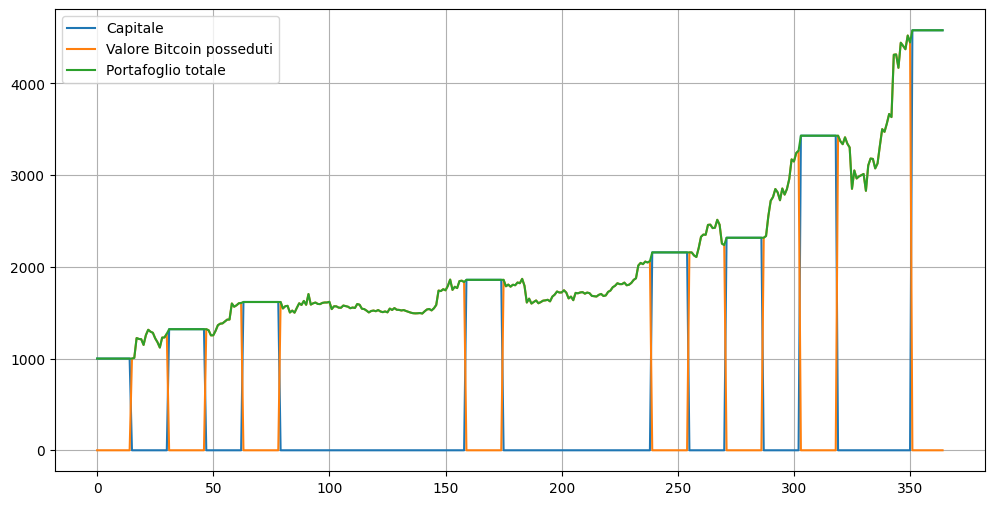

In [238]:
plt.figure(figsize=(12,6))
plt.plot(capitale_lista, label='Capitale')
plt.plot(valore_bitcoin_lista, label='Valore Bitcoin posseduti')
plt.plot(portafoglio_lista, label='Portafoglio totale')
plt.legend()
plt.grid()
plt.show()

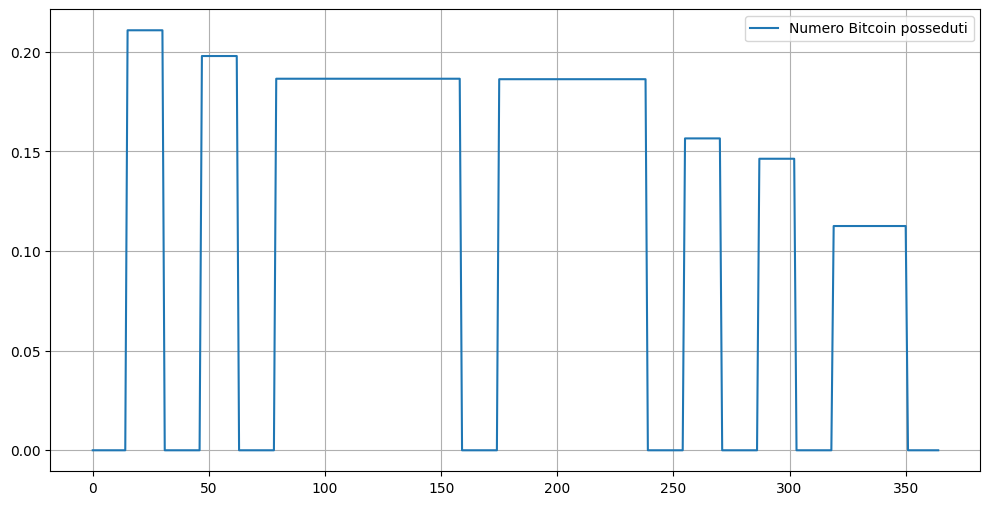

In [239]:
plt.figure(figsize=(12,6))
plt.plot(bitcoins_lista, label='Numero Bitcoin posseduti')
plt.legend()
plt.grid()
plt.show()

### Grid search

In [240]:
# Definisci i valori dei parametri per la grid search
N_values = np.arange(1, 10, 1)
scarto_da_minimo_a_media_values =  np.arange(0.35, 0.46, 0.01)
scarto_da_massimo_a_media_values =  np.arange(0, 0.11, 0.01)
perc_acquisto_values =  np.arange(1, 1.01, 0.1)
perc_vendita_values =  np.arange(1, 1.01, 0.1)
timeframe_values = np.arange(16, 17, 1)

# Crea tutte le combinazioni possibili dei parametri
combinazioni = list(itertools.product(N_values, scarto_da_minimo_a_media_values, scarto_da_massimo_a_media_values, perc_acquisto_values, perc_vendita_values, timeframe_values))

# Inizializza la tabella dei risultati
tabella_grid_search = pd.DataFrame(columns=['Data iniziale', 'Data finale', 'N', 'Scarto da minimo a media', 'Scarto da massimo a media', 'Perc acquisto', 'Perc vendita', 'Timeframe', 'Rendimento portafoglio'])

# Esegui la grid search
for cont, combinazione in enumerate(combinazioni):
    N, scarto_da_minimo_a_media, scarto_da_massimo_a_media, perc_acquisto, perc_vendita, timeframe = combinazione

    dati['Min'] = dati['Price'].rolling(window=N).min()
    dati['Max'] = dati['Price'].rolling(window=N).max()
    dati['Media tra minimo e massimo'] = (dati['Min'] + dati['Max']) / 2


    capitale_iniziale = 1000
    bitcoin_iniziali = 0
    capitale = capitale_iniziale
    bitcoins = bitcoin_iniziali
    ultima_azione = 'Vendita'
    acquisti_fatti = 0
    vendite_fatte = 0

    azioni = []
    ultime_azioni = []
    quantita_euro = []
    quantita_bitcoin = []
    capitale_lista = []
    bitcoins_lista = []
    valore_bitcoin_lista = []
    portafoglio_lista = []
    valore_quantita_euro = 0
    valore_quantita_bitcoin = 0
    azione = '-'

    for i in range(N, len(dati)):
        if i % timeframe == 0:
            if dati['Price'].iloc[i] <= dati['Min'].iloc[i] + scarto_da_minimo_a_media * (dati['Media tra minimo e massimo'].iloc[i] - dati['Min'].iloc[i]) and ultima_azione == 'Vendita':
                prezzo_acquisto = dati['Price'].iloc[i]
                bitcoins_acquistati = (capitale * perc_acquisto) / prezzo_acquisto
                capitale -= prezzo_acquisto * bitcoins_acquistati
                bitcoins += bitcoins_acquistati
                azione = 'Acquisto'
                acquisti_fatti += 1
                ultima_azione = azione
                valore_quantita_euro = prezzo_acquisto * bitcoins_acquistati
                valore_quantita_bitcoin = bitcoins_acquistati
            elif dati['Price'].iloc[i] >= dati['Max'].iloc[i] - scarto_da_minimo_a_media * (dati['Max'].iloc[i] - dati['Media tra minimo e massimo'].iloc[i]) and ultima_azione == 'Acquisto' and dati['Price'].iloc[i] > prezzo_acquisto:
                prezzo_vendita = dati['Price'].iloc[i]
                bitcoins_venduti = bitcoins * perc_vendita
                capitale += prezzo_vendita * bitcoins_venduti
                bitcoins -= bitcoins_venduti
                azione = 'Vendita'
                vendite_fatte += 1
                ultima_azione = azione
                valore_quantita_euro = prezzo_vendita * bitcoins_venduti
                valore_quantita_bitcoin = bitcoins_venduti
            else:
                azione = '-'
                valore_quantita_euro = 0
                valore_quantita_bitcoin = 0
        else:
            azione = '-'
            valore_quantita_euro = 0
            valore_quantita_bitcoin = 0
        
        # azioni.append(azione)
        # ultime_azioni.append(ultima_azione)
        # quantita_euro.append(valore_quantita_euro)
        # quantita_bitcoin.append(valore_quantita_bitcoin)
        # capitale_lista.append(capitale)
        # bitcoins_lista.append(bitcoins)
        # valore_bitcoin_lista.append(bitcoins * dati['Price'].iloc[i])
        portafoglio_lista.append(capitale + bitcoins * dati['Price'].iloc[i])


    rendimento_portafoglio = portafoglio_lista[-1] / portafoglio_lista[0]

    # Aggiungi i risultati alla tabella
    nuova_riga = pd.DataFrame({
    'Data iniziale': [dati['Timestamp'].iloc[0]],
    'Data finale': [dati['Timestamp'].iloc[-1]],
    'N': [N],
    'Scarto da minimo a media': [scarto_da_minimo_a_media],
    'Scarto da massimo a media': [scarto_da_massimo_a_media],
    'Perc acquisto': [perc_acquisto],
    'Perc vendita': [perc_vendita],
    'Timeframe': [timeframe],
    'Rendimento portafoglio': [rendimento_portafoglio],
    'Acquisti fatti': [acquisti_fatti],
    'Vendite fatte': [vendite_fatte]
    })

    tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)

    migliore_combinazione = tabella_grid_search.loc[tabella_grid_search['Rendimento portafoglio'].idxmax()]

    print(f'\n\nCombinazione {cont+1}/{len(combinazioni)}:\n{nuova_riga}')
    print(f'\nCombinazione migliore trovata finora:\n{migliore_combinazione}')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_49756\3261180575.py:102: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tabella_grid_search = pd.concat([tabella_grid_search, nuova_riga], ignore_index=True)




Combinazione 1/1188:
              Data iniziale               Data finale  N  Scarto da minimo a media  Scarto da massimo a media  Perc acquisto  Perc vendita  Timeframe  Rendimento portafoglio  Acquisti fatti  Vendite fatte
0 2020-03-01 00:00:00+00:00 2021-03-01 00:00:00+00:00  1                      0.35                        0.0            1.0           1.0         16                4.579998               7              7

Combinazione migliore trovata finora:
Data iniziale                2020-03-01 00:00:00+00:00
Data finale                  2021-03-01 00:00:00+00:00
N                                                    1
Scarto da minimo a media                          0.35
Scarto da massimo a media                          0.0
Perc acquisto                                      1.0
Perc vendita                                       1.0
Timeframe                                           16
Rendimento portafoglio                        4.579998
Acquisti fatti                   

In [241]:
tabella_grid_search.sort_values(by='Rendimento portafoglio', ascending=False)

,Data iniziale,Data finale,N,Scarto da minimo a media,Scarto da massimo a media,Perc acquisto,Perc vendita,Timeframe,Rendimento portafoglio,Acquisti fatti,Vendite fatte
0,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,1,0.35,0.00,1.0,1.0,16,4.579998,7.0,7.0
83,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,1,0.42,0.06,1.0,1.0,16,4.579998,7.0,7.0
97,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,1,0.43,0.09,1.0,1.0,16,4.579998,7.0,7.0
96,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,1,0.43,0.08,1.0,1.0,16,4.579998,7.0,7.0
95,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,1,0.43,0.07,1.0,1.0,16,4.579998,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
699,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,6,0.38,0.06,1.0,1.0,16,1.149569,1.0,1.0
698,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,6,0.38,0.05,1.0,1.0,16,1.149569,1.0,1.0
697,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,6,0.38,0.04,1.0,1.0,16,1.149569,1.0,1.0
696,2020-03-01 00:00:00+00:00,2021-03-01 00:00:00+00:00,6,0.38,0.03,1.0,1.0,16,1.149569,1.0,1.0
